<a href="https://colab.research.google.com/github/kamrulkonok/UPC_ML_Project/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Data

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

In [295]:
# merged data file
df = pd.read_csv("../data/merged_airbnb_data.csv", index_col = 0)
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


## Features in the dataset

- `realSum` : Price of accommodation for two people for two nights (EUR)
- `room_type` : type of accommodation ['Private room', 'Entire home/apt', 'Shared room']
- `room_shared` : variable for shared rooms ['True', 'False']
- `room_private` : variable for private rooms ['True', 'False']
- `person_capacity` : maximum number of guests
- `host_is_superhost` : superhost status ['True', 'False']
- `multi` : if listing belongs to host with 2-4 offers [0, 1]
- `biz` : if listing belongs to host with > 4 offers [0, 1]
- `cleanliness_rating`
- `guest_satisfaction_overall` : overall rating of listing
- `bedrooms` : number of bedrooms (0 for studios)
- `dist` : distance from city centre (in km)
- `metro_dist` : distance from nearest metro station (in km)
- `attr_index` : attraction index of listing location
- `attr_index_norm` : normalized attraction index (0 - 100)
- `rest_index` : restaurant index of listing location
- `rest_index_norm` : normalized restaurant index (0 - 100)
- `lng` : longitude
- `lat` : latitude
- `city`
- `day_type` : weekend or weekday

## Shpae of the dataset = (51707, 22)

## The dataset does not contain any null values

## The dataset does not contain any duplicate values


In [296]:
# Display basic information about the dataset
data_info = {
    "info": df.info(),
    "columns": df.columns.tolist(),
    "shape": df.shape,
    "data_types": df.dtypes.to_dict(),
    "missing_values": df.isnull().sum().to_dict(),
    "duplicate_values": df.duplicated().sum(),
    "sample_data": df.head().to_dict(orient="list")
}

data_info

<class 'pandas.core.frame.DataFrame'>
Index: 51707 entries, 0 to 1798
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  51707 non

{'info': None,
 'columns': ['realSum',
  'room_type',
  'room_shared',
  'room_private',
  'person_capacity',
  'host_is_superhost',
  'multi',
  'biz',
  'cleanliness_rating',
  'guest_satisfaction_overall',
  'bedrooms',
  'dist',
  'metro_dist',
  'attr_index',
  'attr_index_norm',
  'rest_index',
  'rest_index_norm',
  'lng',
  'lat',
  'city',
  'day_type'],
 'shape': (51707, 21),
 'data_types': {'realSum': dtype('float64'),
  'room_type': dtype('O'),
  'room_shared': dtype('bool'),
  'room_private': dtype('bool'),
  'person_capacity': dtype('float64'),
  'host_is_superhost': dtype('bool'),
  'multi': dtype('int64'),
  'biz': dtype('int64'),
  'cleanliness_rating': dtype('float64'),
  'guest_satisfaction_overall': dtype('float64'),
  'bedrooms': dtype('int64'),
  'dist': dtype('float64'),
  'metro_dist': dtype('float64'),
  'attr_index': dtype('float64'),
  'attr_index_norm': dtype('float64'),
  'rest_index': dtype('float64'),
  'rest_index_norm': dtype('float64'),
  'lng': dtype(

# Data Preprocessing

## 0. Basic checks

In [297]:
# checking for duplicates
df.duplicated().sum()

0

In [298]:
# check for NaNs
df.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
day_type                      0
dtype: int64

* `realSum (Price)`: The average price is around 279.88 EUR with a standard deviation of 327.95 EUR.
* `person_capacity`: Most listings can accommodate around 2 to 4 guests, with a mean capacity of approximately 3.16 guests.
* `cleanliness_rating`: The average cleanliness rating is 9.39, indicating generally high cleanliness.
* `guest_satisfaction_overall`: The overall satisfaction rating is high, with an average of 92.63.
* `dist (Distance from city center)`: The mean distance is approximately 3.19 km.
* `metro_dist`: The mean distance to the nearest metro station is around 0.68 km.
* `attr_index and rest_index`: These indices show a wide range of
values, reflecting varying levels of attraction and restaurant quality around the listings.



In [299]:
# to showcase both numerical and categorical variables
df.describe(include='all')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
count,51707.000000,51707,51707,51707,51707.000000,51707,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707,51707
unique,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2
top,NaN,Entire home/apt,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,london,weekends
freq,NaN,32648,51341,33014,NaN,38475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9993,26207
mean,279.879591,NaN,NaN,NaN,3.161661,NaN,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,NaN,NaN
std,327.948386,NaN,NaN,NaN,1.298545,NaN,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,NaN,NaN
min,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,NaN
25%,148.752174,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,NaN,NaN
50%,211.343089,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,NaN,NaN
75%,319.694287,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,NaN,NaN


In [300]:
# categorical columns (including booleans & binary)
cat_columns = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz', 'city', 'day_type']

In [301]:
def print_unique_values(df, columns):
    for column in columns:
        if column in df.columns:
            unique_values_counts = df[column].value_counts()
            print(f"Unique values in column '{column}' and their counts:")
            for value, count in unique_values_counts.items():
                print(f"{value}: {count}")
            print("\n")

In [302]:
# check if the categorical columns have the correct categories within
print_unique_values(df, cat_columns)

Unique values in column 'room_type' and their counts:
Entire home/apt: 32648
Private room: 18693
Shared room: 366


Unique values in column 'room_shared' and their counts:
False: 51341
True: 366


Unique values in column 'room_private' and their counts:
False: 33014
True: 18693


Unique values in column 'host_is_superhost' and their counts:
False: 38475
True: 13232


Unique values in column 'multi' and their counts:
0: 36642
1: 15065


Unique values in column 'biz' and their counts:
0: 33599
1: 18108


Unique values in column 'city' and their counts:
london: 9993
rome: 9027
paris: 6688
lisbon: 5763
athens: 5280
budapest: 4022
vienna: 3537
barcelona: 2833
berlin: 2484
amsterdam: 2080


Unique values in column 'day_type' and their counts:
weekends: 26207
weekdays: 25500




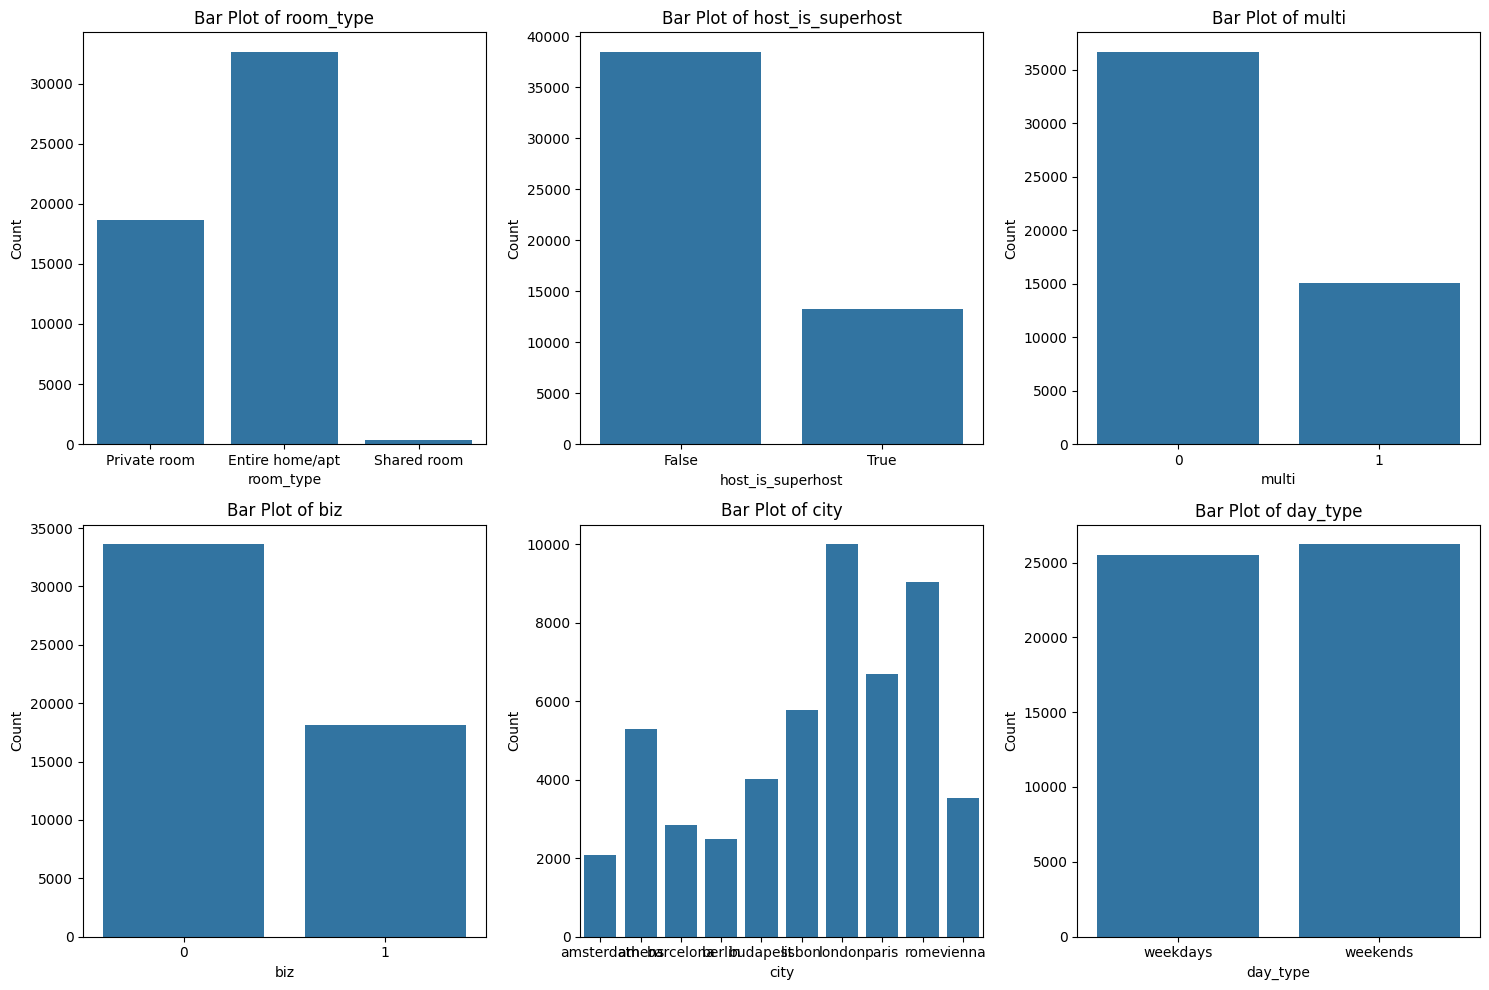

In [303]:
# Check if the data is balanced or not

categorical_columns = ["room_type", "host_is_superhost", "multi", "biz", "city", "day_type"]

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 1. Removing Irrelevant and redundant columns
* The analysis shows that listings with shared rooms (`room_shared` = True) have significantly lower average realSum compared to those without shared rooms. However, the number of entries for shared rooms is quite low (366 compared to 32648 for `entire home/ apt` and 18693 for `private room`).

* The `room_shared` and `room_private` columns are redundant because their information is fully captured by the `room_type` column.

In [304]:
# Check the relationship between 'room_type', 'room_shared', and 'room_private'
room_type_vs_shared_private = df.groupby(['room_type', 'room_shared', 'room_private']).size()

room_type_vs_shared_private

room_type        room_shared  room_private
Entire home/apt  False        False           32648
Private room     False        True            18693
Shared room      True         False             366
dtype: int64

In [305]:
# Remove irrelevant and redundant columns (room_shared, room_private, attr_index and rest_index as their normalized forms exist, and location coordinates)

cols_to_drop = ['room_shared', 'room_private', 'lng', 'lat', 'attr_index', 'rest_index']
df = df.drop(columns=cols_to_drop)

In [306]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000


### Dummy Encoding


When to Use Each
One-Hot Encoding: This is useful when you want to ensure no information is lost, which can be important for certain models, particularly those that do not suffer from multicollinearity issues (e.g., decision trees, neural networks).


Dummy Encoding: This is commonly used in linear models (e.g., linear regression, logistic regression) to avoid multicollinearity, which can cause issues in estimating the model parameters accurately.


https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding/329281#329281

With linear regression, or generalized linear models estimated by maximum likelihood (or least squares) (in R this means using functions lm or glm), you need to leave out one column. Otherwise you will get a message about some columns "left out because of singularities".

But if you estimate such models with regularization, for example ridge, lasso er the elastic net, then you should not leave out any columns. The regularization takes care of the singularities, and more important, the prediction obtained may depend on which columns you leave out. That will not happen when you do not use regularization

# 2. One Hot Encoding

Label Encodings are used when there is an inherent order between the categories i.e. 1, 2, 3 actually mean something in that order. But in our case, all the categories in a column are independent and don't represent any order. Therefore, we go with One Hot Encoding.

Applying one hot encoding to `room_type`, `city`, `day_type` columns which contains categorical values.

One-hot encoding isn't typically used for binary variables like True and False because it's redundant; the information is already encoded in a single binary feature.

True --> 1
False --> 0


In [307]:
# binary encoding for 'room_type' column
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

# Define categorical features for one-hot encoding
categorical_features = ['room_type', 'city', 'day_type']

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_features])

# Convert encoded data to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Reset indices to avoid NaN values during concatenation
df = df.reset_index(drop=True)
encoded_categorical_df = encoded_categorical_df.reset_index(drop=True)

# Combine the encoded categorical data with the original data
df = pd.concat([df.drop(columns=categorical_features), encoded_categorical_df], axis=1)

print(df.columns)

Index(['realSum', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index_norm', 'rest_index_norm',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_amsterdam', 'city_athens',
       'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
       'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'day_type_weekdays', 'day_type_weekends'],
      dtype='object')


In [308]:
df.head()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Outlier Analysis

Since Machine learning models can be affected by high values, therefore it is important to take care / acknowledge the presence of outliers, if any.

### IQR

One easy criteria to decide which values are outliers is to use the distance between quartiles. Specifically, outliers are defined as :
* The values smaller than Q1 - 1.5*IQR
* The values bigger than Q3 + 1.5*IQR

In [309]:
df.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837
std,327.948386,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958
min,34.779339,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,211.343089,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,319.694287,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18545.450285,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`realSum`, `dist`, `metro_dist`, `attr_index_norm` & `rest_index_norm` all have outliers.

In [310]:
# Function to find outliers using IQR for each column
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [311]:
outliers = find_outliers_iqr(df, 'realSum')
outliers.sort_values(by='realSum', ascending=False)['realSum']

3590     18545.450285
34803    16445.614689
24348    15499.894165
48380    13664.305916
50787    13656.358834
             ...     
45338      576.298132
40830      576.298132
8766       576.256197
630        576.242589
16312      576.209052
Name: realSum, Length: 3662, dtype: float64

In [312]:
df.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,13.423792,22.786177,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837
std,327.948386,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,9.807985,17.804096,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958
min,34.779339,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,0.926301,0.592757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,6.380926,8.751480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,211.343089,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,11.468305,17.542238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,319.694287,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,17.415082,32.964603,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,18545.450285,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
outliers.query('realSum > 1200')

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends
7,2771.307384,4.0,1,0,0,10.0,100.0,3,1.686807,1.458404,11.056528,18.975219,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,1609.917278,6.0,0,1,0,10.0,96.0,3,2.988589,1.750003,11.011222,16.847448,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92,1557.190730,4.0,1,0,0,9.0,98.0,2,0.750395,0.808683,44.173966,42.063930,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99,3004.944579,4.0,0,0,0,9.0,95.0,4,1.615295,1.402539,11.472769,19.762890,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102,1376.514424,4.0,1,0,1,10.0,93.0,2,1.930702,1.585825,9.799591,17.310023,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47009,2311.738714,2.0,0,0,0,10.0,100.0,1,1.731672,1.054644,6.828503,17.853945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47039,1907.044163,5.0,0,1,0,6.0,60.0,3,2.978378,1.148510,15.739358,34.808324,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
48215,12942.991375,4.0,0,0,1,7.0,93.0,1,1.497979,0.396893,8.864325,4.685995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
48380,13664.305916,2.0,0,0,0,9.0,87.0,1,2.239501,0.414395,9.191812,4.818080,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Determine skewness

Interpretation of Skewness Values


Skewness ≈ 0: The data is fairly symmetrical.

Skewness > 0: The data is positively skewed (right-skewed), with a longer tail on the right side of the distribution.

Skewness < 0: The data is negatively skewed (left-skewed), with a longer tail on the left side of the distribution.

In [314]:
df.skew()

realSum                       21.419957
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502


# 3. Feature Engineering

In [315]:
df['space_index'] = df['bedrooms'] * df['person_capacity']

df['metro_to_city_dist_ratio'] = df['metro_dist'] / df['dist']

In [316]:
df.head()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio
0,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.505554
1,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.490191
2,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.635251
3,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.142945
4,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.585038


# Transformations for Distribution

We have found from our EDA that `realSum` column has outliers due to its skewness, # What does this mean Konok?



Therefore apply log transformation to reduce it and creating a new column `price` to store the transformed values


Skewness is present in realSum, which is the y variable. If your target variable (y) is positively skewed, transforming it can often be beneficial. Many machine learning models, particularly linear models, assume that the target variable is normally distributed. Transforming a positively skewed y can help in meeting this assumption, leading to better model performance and more reliable predictions. It can also help in reducing the impact of outliers.

Skewness is also present in room_shared, because there are only 366 values supporting it. Same for room_type_shared.

Log Transformation : This is effective for data that are strictly positive.

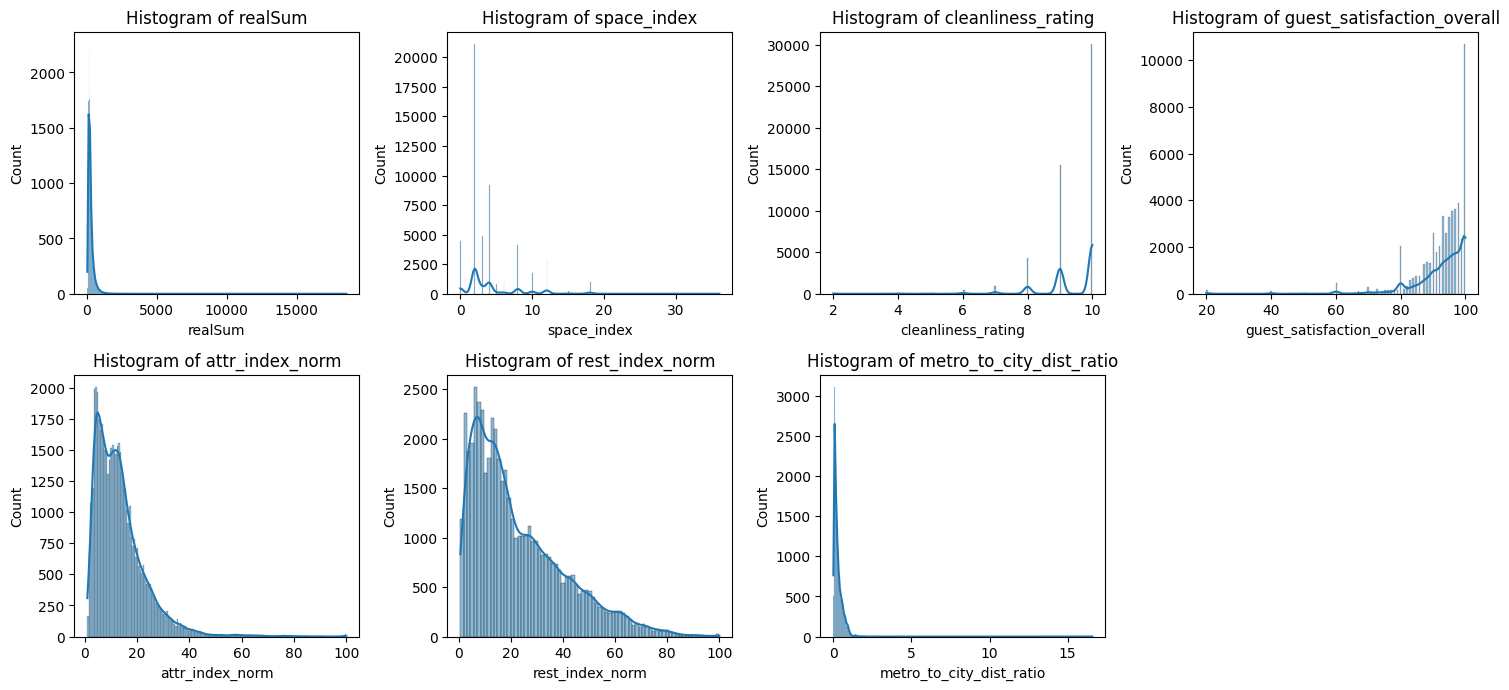

In [317]:
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ["realSum", "space_index", "cleanliness_rating", "guest_satisfaction_overall",
                     "attr_index_norm", "rest_index_norm", "metro_to_city_dist_ratio"]

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [318]:
df.skew()

realSum                       21.419957
person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -3.174908
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502


# 4. Handling Outliers
### Log Transformation
This was applied to the `price` (formerly `realSum`) and `metro_to_city_dist_ratio` features. Log transformation helps in stabilizing variance and reducing the impact of extreme values. The figure below illustrates the distribution of these features before applying the log transformation, showing significant skewness and outliers.

### Box-Cox Transformation
Applied to the `guest_satisfaction_overall` feature to make the data more normal distribution-like, which helps in stabilizing variance and reducing skewness. The figure below demonstrates the effect of the Box-Cox transformation, showing a more normalized distribution.



In [319]:
# Apply log transformation to the realSum and metro_to_city_dist_ratio column
df['price'] = np.log(df['realSum'])
df = df.drop(columns=['realSum'])
df['metro_to_city_dist_ratio'] = np.log(df['metro_to_city_dist_ratio'])

# Apply Box-Cox transformation to the guest_satisfaction_overall column
columns_to_boxcox = ['guest_satisfaction_overall']
power_transformer = PowerTransformer(method='box-cox', standardize=False)
df['guest_satisfaction_overall'] = power_transformer.fit_transform(df[['guest_satisfaction_overall']] + 1)

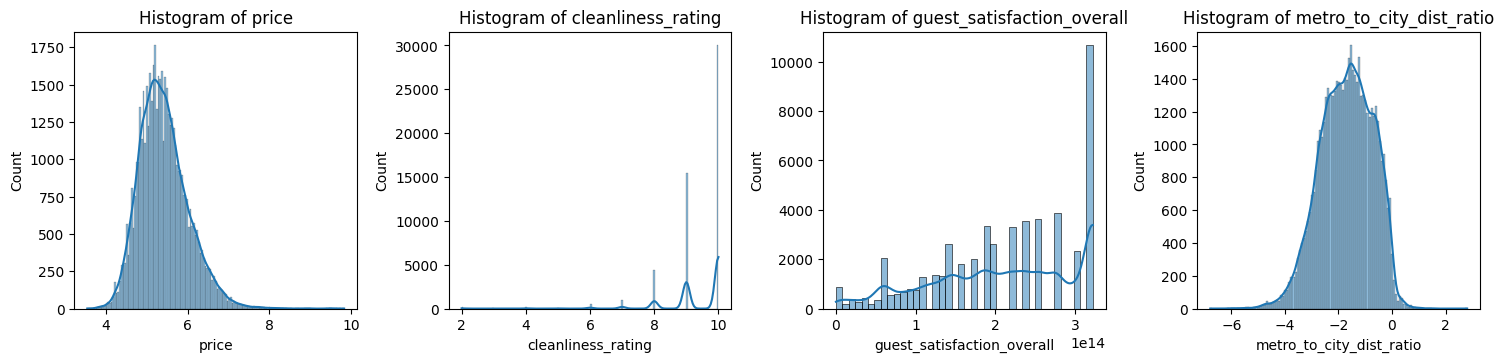

In [320]:
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ["price", "cleanliness_rating", "guest_satisfaction_overall", "metro_to_city_dist_ratio"]

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [321]:
df.skew()

person_capacity                0.760003
host_is_superhost              1.118798
multi                          0.918395
biz                            0.628049
cleanliness_rating            -2.850286
guest_satisfaction_overall    -0.395843
bedrooms                       1.367776
dist                           1.731195
metro_dist                     4.060445
attr_index_norm                2.193167
rest_index_norm                1.097455
room_type_Entire home/apt     -0.544781
room_type_Private room         0.576497
room_type_Shared room         11.759724
city_amsterdam                 4.679991
city_athens                    2.628140
city_barcelona                 3.912867
city_berlin                    4.226999
city_budapest                  3.152929
city_lisbon                    2.469418
city_london                    1.553712
city_paris                     2.209107
city_rome                      1.714559
city_vienna                    3.419502
day_type_weekdays              0.027350


## 5. Feature Scaling 

### Standardization
Standardization transforms the data so it has a mean of 0 and a standard deviation of 1. It is suitable for data that follows a Gaussian distribution (or approximately so).

We used standardization for features like `price`, `metro_to_city_dist_ratio`, and `space_index*` because these features benefit from having a mean of 0 and a standard deviation of 1. This scaling helps linear models (e.g., linear regression, lasso regression, ridge regression) perform better by stabilizing the variance and ensuring the optimization process converges more efficiently.

### Min-Max Scaling
Min-Max Scaling transforms the data to fit within a specified range, typically [0, 1]. It is useful when you need to preserve the relationships of the data.

Min-Max Scaling was applied to features like `cleanliness_rating` and `guest_satisfaction_overall`. This scaling method is beneficial for algorithms like SVM and neural networks, which can be sensitive to the scale of input data. By transforming these features to a [0, 1] range, we ensure that no single feature dominates due to its scale.

### Robust Scaling
Robust Scaling transforms the data using the median and the interquartile range (IQR), making it less sensitive to outliers. Robust Scaling was applied to features such as `attr_index_norm` and `rest_index_norm`. This method is particularly effective when the dataset contains outliers, as it uses statistics that are robust to outliers. For models like decision trees, random forest, and XGBoost, which are generally robust to feature scales but can benefit from outlier treatment, this scaling ensures that extreme values do not disproportionately affect the training process.


Standardization has been applied to the log transformed feature to make sure they can feed into the regression model

In [322]:
standard_scaler = StandardScaler()
columns_to_scale = ['price', 'metro_to_city_dist_ratio', 'space_index']
df[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())

      price  metro_to_city_dist_ratio  space_index
0 -0.253920                  1.043721    -0.563830
1  0.707075                  1.011956    -0.032003
2  0.262849                  1.278779    -0.563830
3  1.093609                  1.883336     1.031651
4  1.283568                  1.194023    -0.563830


MinMaxScaler is used to scale features to a specified range, typically between 0 and 1. It works by subtracting the minimum value and dividing by the range of the data.


In [323]:
minmax_scaler = MinMaxScaler()

columns_to_standardize = ['cleanliness_rating', 'guest_satisfaction_overall']

df[columns_to_standardize] = minmax_scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())

   cleanliness_rating  guest_satisfaction_overall
0               1.000                    0.575995
1               0.750                    0.290887
2               0.875                    0.347063
3               0.875                    0.448981
4               1.000                    0.857603


Robust Scaler has been applied to reduce the impact of outliers

In [324]:
robust_scaler = RobustScaler()
columns_to_robust_scale = ['attr_index_norm', 'rest_index_norm']
df[columns_to_robust_scale] = robust_scaler.fit_transform(df[columns_to_robust_scale])
print(df[columns_to_robust_scale].head())

   attr_index_norm  rest_index_norm
0        -0.661727        -0.441734
1         1.989541         1.685065
2        -0.678112        -0.449985
3         1.327768         1.793710
4         1.613574         1.621825


In [325]:
df.describe()

,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio,price
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,5.170700e+04,5.170700e+04,5.170700e+04
mean,3.161661,0.255903,0.291353,0.350204,0.923828,0.648554,1.15876,3.191285,0.681540,0.177221,0.216574,0.631404,0.361518,0.007078,0.040227,0.102114,0.054789,0.048040,0.077784,0.111455,0.193262,0.129344,0.174580,0.068405,0.493163,0.506837,-5.166884e-17,1.165297e-16,-5.667082e-16
std,1.298545,0.436372,0.454390,0.477038,0.119359,0.280081,0.62741,2.393803,0.858023,0.888875,0.735308,0.482429,0.480445,0.083835,0.196492,0.302801,0.227571,0.213853,0.267835,0.314698,0.394861,0.335584,0.379611,0.252441,0.499958,0.499958,1.000010e+00,1.000010e+00,1.000010e+00
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.015045,0.002301,-0.955397,-0.700012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.095657e+00,-5.237588e+00,-3.135289e+00
25%,2.000000,0.000000,0.000000,0.000000,0.875000,0.448981,1.00000,1.453142,0.248480,-0.461057,-0.363058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.638302e-01,-7.094350e-01,-6.993653e-01
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.677087,1.00000,2.613538,0.413269,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.979166e-01,4.772252e-02,-1.106885e-01
75%,4.000000,1.000000,1.000000,1.000000,1.000000,0.926424,1.00000,4.263077,0.737840,0.538943,0.636942,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-3.200302e-02,7.684137e-01,5.830533e-01
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000,25.284557,14.273577,8.023423,3.405499,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.477232e+00,4.636545e+00,7.389379e+00


# 6. Checking Multicolinearity 

Multicollinearity refers to the high correlation between two or more independent variables in a regression model, which can lead to issues in interpreting the effects of individual variables on the dependent variable.

As the `bedrooms` and `person_capacity` has higher collinearity, therefore, combining them into one feature and naming it `space_index`, same logic has been applied to the `metro_to_city_dist_ratio`. This ratio shows how far the listing is from the metro station relative to the city center. A higher ratio indicates that the listing is closer to the city center compared to the metro.

In [326]:
# Ensure all columns in the DataFrame are numeric
numeric_df = df.select_dtypes(include=[float, int])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

/Users/kamrul.konok/anaconda3/envs/py311/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature              VIF
0              person_capacity             6.37
1            host_is_superhost             1.18
2                        multi             1.38
3                          biz             1.60
4           cleanliness_rating             1.66
5   guest_satisfaction_overall             1.85
6                     bedrooms             9.75
7                         dist             5.05
8                   metro_dist             3.68
9              attr_index_norm             3.24
10             rest_index_norm             3.66
11   room_type_Entire home/apt       6601186.10
12      room_type_Private room        216113.03
13       room_type_Shared room  117964760064.71
14              city_amsterdam              inf
15                 city_athens              inf
16              city_barcelona              inf
17                 city_berlin              inf
18               city_budapest              inf
19                 city_lisbon          

Removing reduntant features to get rid of the curse of dimensionality and multicolinearity 

In [327]:
cols_to_drop = ['bedrooms', 'person_capacity', 'dist', 'metro_dist']


df = df.drop(columns=cols_to_drop)
df.columns

Index(['host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'attr_index_norm', 'rest_index_norm',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_amsterdam', 'city_athens',
       'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
       'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'day_type_weekdays', 'day_type_weekends', 'space_index',
       'metro_to_city_dist_ratio', 'price'],
      dtype='object')

*Note* :
Why are some values coming as infinite?
Because they after applying one hot encoding values either convert to 1 or 0, for 0 it is giving inf or higher values for example, ignore these feature in this VIF calculation.

- room_type_Entire home/apt
- room_type_Private room 
- room_type_Shared room 
- city_amsterdam
- city_athens
- city_barcelona
- city_berlin
- city_budapest
- city_lisbon
- city_london
- city_paris
- city_rome
- city_vienna
- day_type_weekdays
- day_type_weekends

In [328]:
# Ensure all columns in the DataFrame are numeric
numeric_df = df.select_dtypes(include=[float, int])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

                       feature              VIF
0            host_is_superhost             1.18
1                        multi             1.38
2                          biz             1.57
3           cleanliness_rating             1.66
4   guest_satisfaction_overall             1.84
5              attr_index_norm             2.73
6              rest_index_norm             3.47
7    room_type_Entire home/apt       2991472.51
8       room_type_Private room       1129815.85
9        room_type_Shared room  146076113827.88
10              city_amsterdam        103323.28
11                 city_athens    1071038757.94
12              city_barcelona     528887949.74
13                 city_berlin    9932851631.09
14               city_budapest     611111829.48
15                 city_lisbon     759758638.34
16                 city_london     266831821.69
17                  city_paris     140880958.00
18                   city_rome   10795287494.12
19                 city_vienna    296172

In [329]:
df.head()

,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,attr_index_norm,rest_index_norm,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekdays,day_type_weekends,space_index,metro_to_city_dist_ratio,price
0,0,1,0,1.000,0.575995,-0.661727,-0.441734,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.043721,-0.253920
1,0,0,0,0.750,0.290887,1.989541,1.685065,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.032003,1.011956,0.707075
2,0,0,1,0.875,0.347063,-0.678112,-0.449985,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.278779,0.262849
3,0,0,1,0.875,0.448981,1.327768,1.793710,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.031651,1.883336,1.093609
4,1,0,0,1.000,0.857603,1.613574,1.621825,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.563830,1.194023,1.283568


In [330]:
# save to csv
df.to_csv('../data/preprocessed_airbnb_data.csv', index=False)